<a href="https://colab.research.google.com/github/Ru-dra04/customer_segmentation_mobile_users/blob/main/customer_segmentation_mobile_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Example dataset with columns

# Convert the dataset into a DataFrame
df=pd.read_csv('/content/user_behavior_dataset.csv')


In [5]:

# Data preprocessing: Convert categorical columns to numerical values
# Map Operating System (Android = 0, iOS = 1)
df['Operating System'] = df['Operating System'].map({'Android': 0, 'iOS': 1})


In [6]:

# Map Gender (Male = 0, Female = 1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select relevant columns for clustering
features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
            'Battery Drain (mAh/day)', 'Number of Apps Installed',
            'Data Usage (MB/day)', 'Age', 'Gender', 'Operating System']

X = df[features]


In [7]:

# Standardize the features to normalize the scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Print the dataset with the cluster labels
print(df)


     User ID        Device Model  Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5                 0                       393   
1          2           OnePlus 9                 0                       268   
2          3        Xiaomi Mi 11                 0                       154   
3          4      Google Pixel 5                 0                       239   
4          5           iPhone 12                 1                       187   
..       ...                 ...               ...                       ...   
695      696           iPhone 12                 1                        92   
696      697        Xiaomi Mi 11                 0                       316   
697      698      Google Pixel 5                 0                        99   
698      699  Samsung Galaxy S21                 0                        62   
699      700           OnePlus 9                 0                       212   

     Screen On Time (hours/day)  Batter

In [9]:

# Visualizing the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


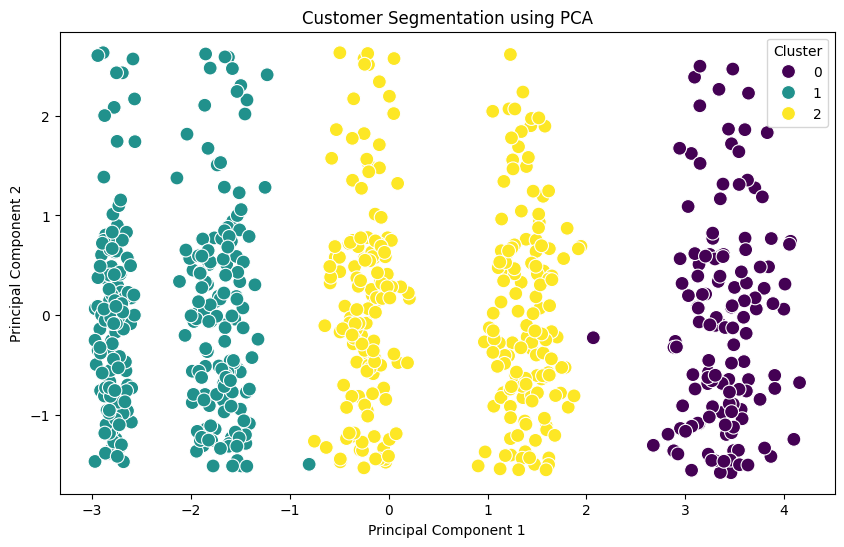

Cluster Summary Statistics:


In [10]:

# Add the PCA components to the dataframe for visualization
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segmentation using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Summary statistics by cluster
print("Cluster Summary Statistics:")

In [11]:

# Exclude non-numeric columns from the mean calculation
numeric_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                    'Battery Drain (mAh/day)', 'Number of Apps Installed',
                    'Data Usage (MB/day)', 'Age', 'Gender', 'Operating System']
print(df.groupby('Cluster')[numeric_features].mean())


         App Usage Time (min/day)  Screen On Time (hours/day)  \
Cluster                                                         
0                      540.686131                   10.098540   
1                       97.770318                    2.297880   
2                      314.453571                    5.918214   

         Battery Drain (mAh/day)  Number of Apps Installed  \
Cluster                                                      
0                    2698.321168                 89.167883   
1                     678.879859                 23.021201   
2                    1806.492857                 59.807143   

         Data Usage (MB/day)        Age    Gender  Operating System  
Cluster                                                              
0                1971.138686  38.065693  0.445255          0.226277  
1                 332.724382  38.367491  0.448763          0.190813  
2                1023.617857  38.803571  0.528571          0.217857  


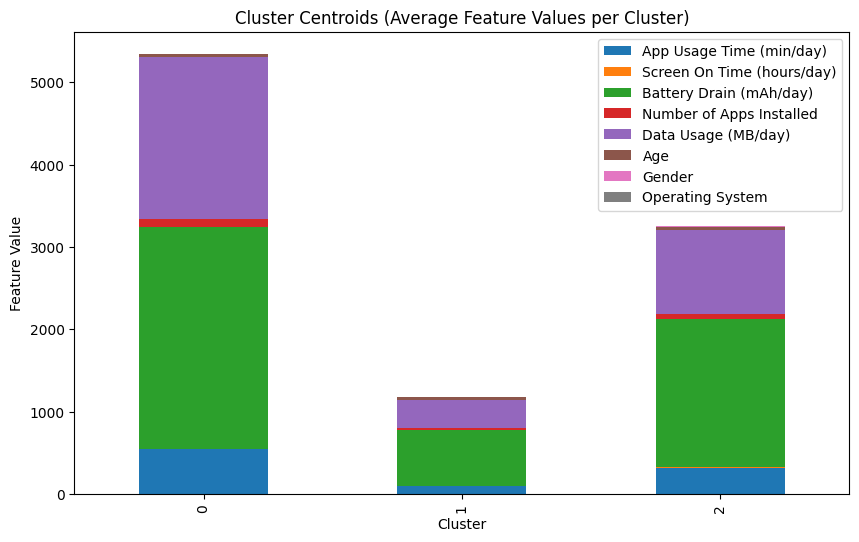

In [12]:

# Visualizing the cluster centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
centroids['Cluster'] = centroids.index

# Bar plot to visualize centroids for each cluster
centroids.plot(kind='bar', x='Cluster', stacked=True, figsize=(10, 6))
plt.title('Cluster Centroids (Average Feature Values per Cluster)')
plt.ylabel('Feature Value')
plt.show()

In [14]:
# Cluster Interpretation and Summary Statistics

cluster_summary = df.groupby('Cluster').agg({
    'App Usage Time (min/day)': 'mean',
    'Screen On Time (hours/day)': 'mean',
    'Battery Drain (mAh/day)': 'mean',
    'Number of Apps Installed': 'mean',
    'Data Usage (MB/day)': 'mean',
    'Age': 'mean',
    # Exclude 'Operating System' and any other non-numeric columns
})

# Display cluster summary statistics
print(cluster_summary)

         App Usage Time (min/day)  Screen On Time (hours/day)  \
Cluster                                                         
0                      540.686131                   10.098540   
1                       97.770318                    2.297880   
2                      314.453571                    5.918214   

         Battery Drain (mAh/day)  Number of Apps Installed  \
Cluster                                                      
0                    2698.321168                 89.167883   
1                     678.879859                 23.021201   
2                    1806.492857                 59.807143   

         Data Usage (MB/day)        Age  
Cluster                                  
0                1971.138686  38.065693  
1                 332.724382  38.367491  
2                1023.617857  38.803571  


<ipython-input-15-ef2f30be7953>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='App Usage Time (min/day)', data=df, palette='coolwarm')


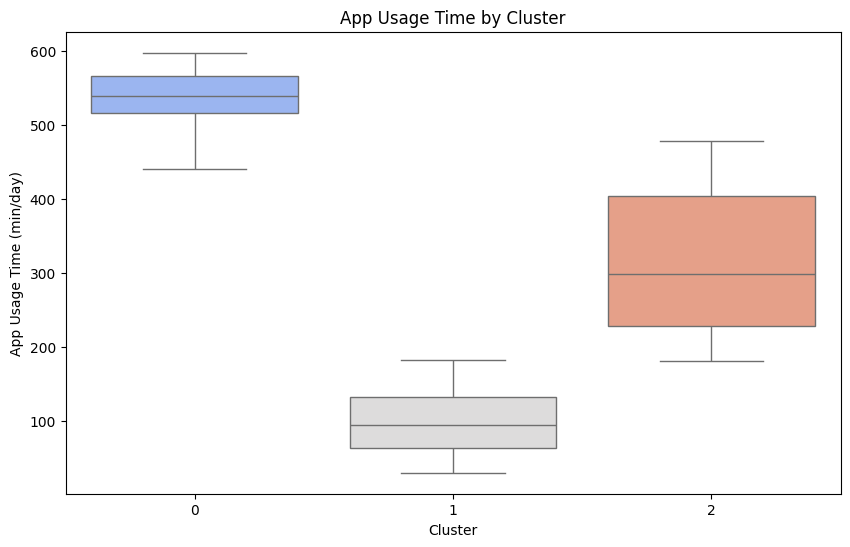

<ipython-input-15-ef2f30be7953>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Battery Drain (mAh/day)', data=df, palette='viridis')


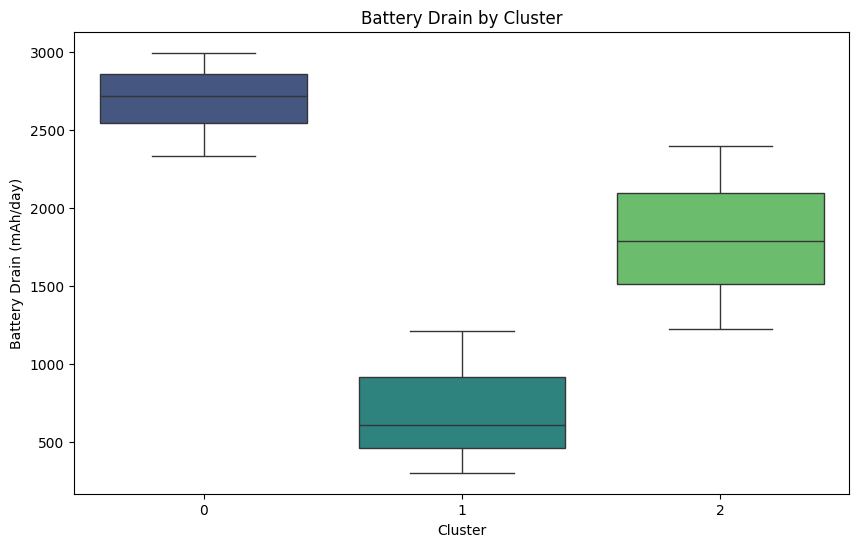

In [15]:
# Cluster Comparison Using Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='App Usage Time (min/day)', data=df, palette='coolwarm')
plt.title('App Usage Time by Cluster')
plt.show()

# Boxplot for battery drain by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Battery Drain (mAh/day)', data=df, palette='viridis')
plt.title('Battery Drain by Cluster')
plt.show()


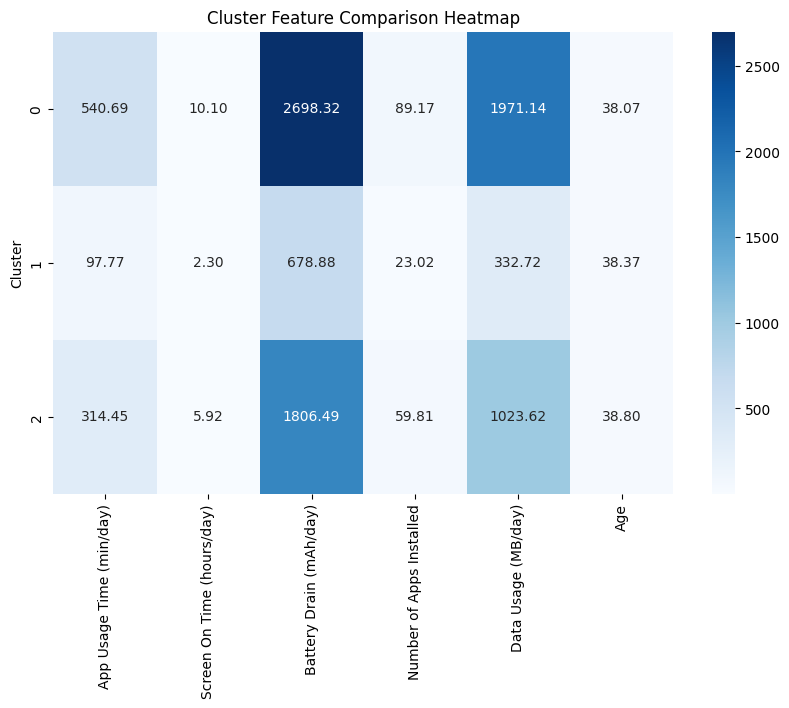

In [16]:
# Heatmap to compare feature means across clusters
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary, annot=True, cmap='Blues', fmt='.2f')
plt.title('Cluster Feature Comparison Heatmap')
plt.show()


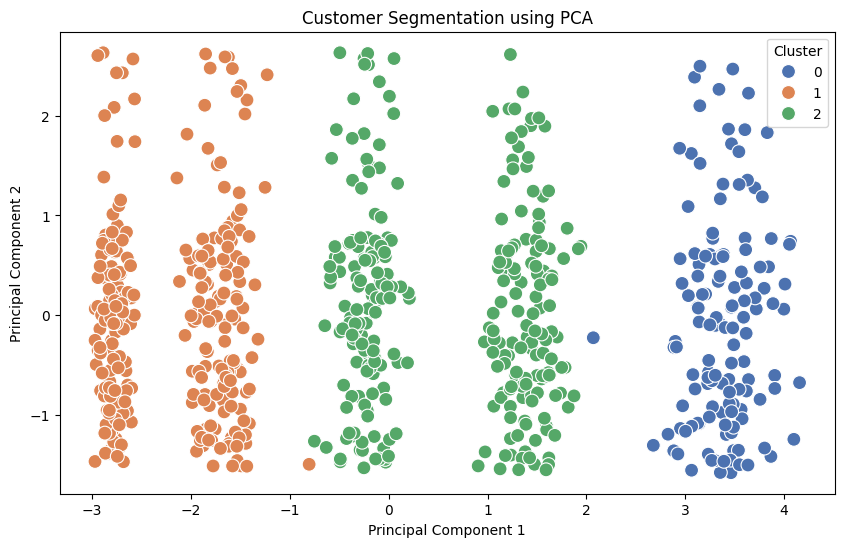

Explained variance by the first 2 components: [0.59873408 0.12885223]


In [18]:
# Scatter plot of the clusters using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='deep', s=100)
plt.title('Customer Segmentation using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance of PCA components
print(f"Explained variance by the first 2 components: {pca.explained_variance_ratio_}")


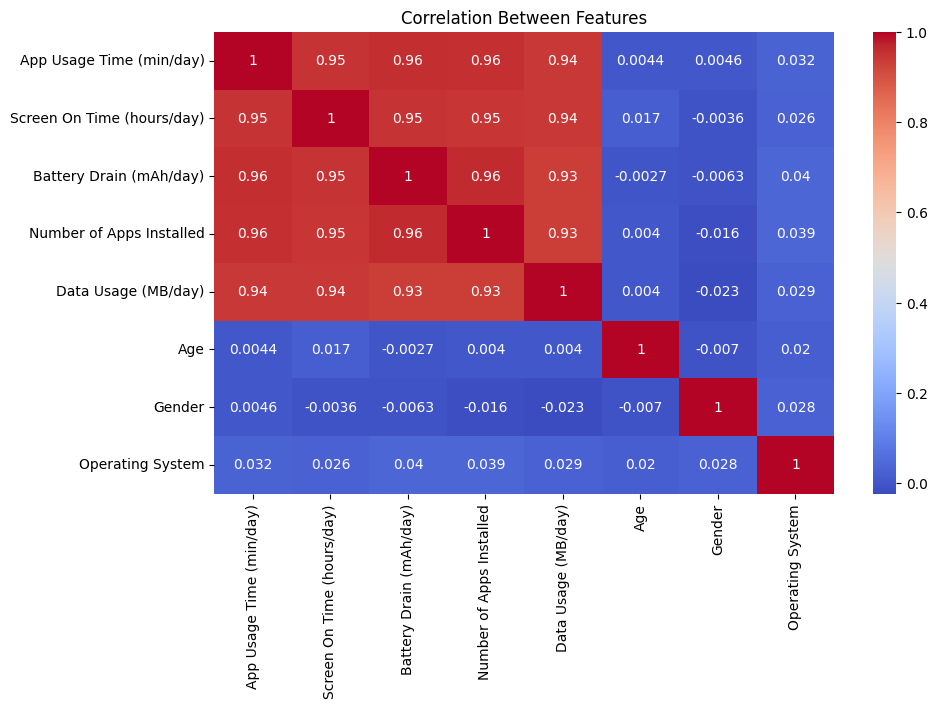

In [19]:
# Correlation matrix to understand feature relationships
correlation_matrix = df[features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


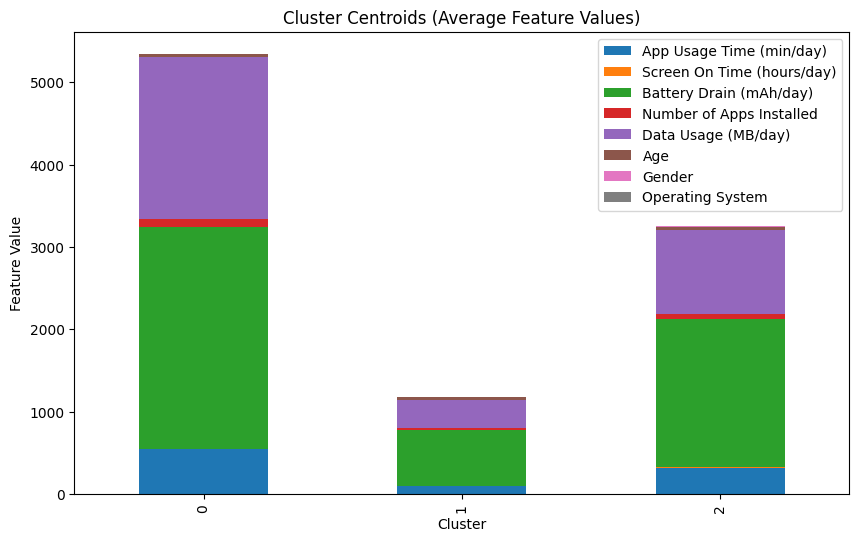

   App Usage Time (min/day)  Screen On Time (hours/day)  \
0                540.686131                   10.098540   
1                 97.770318                    2.297880   
2                314.453571                    5.918214   

   Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0              2698.321168                 89.167883          1971.138686   
1               678.879859                 23.021201           332.724382   
2              1806.492857                 59.807143          1023.617857   

         Age    Gender  Operating System  Cluster  
0  38.065693  0.445255          0.226277        0  
1  38.367491  0.448763          0.190813        1  
2  38.803571  0.528571          0.217857        2  


In [20]:
# Visualizing the cluster centroids
centroids.plot(kind='bar', x='Cluster', stacked=True, figsize=(10, 6))
plt.title('Cluster Centroids (Average Feature Values)')
plt.ylabel('Feature Value')
plt.show()

# Display centroid values
print(centroids)


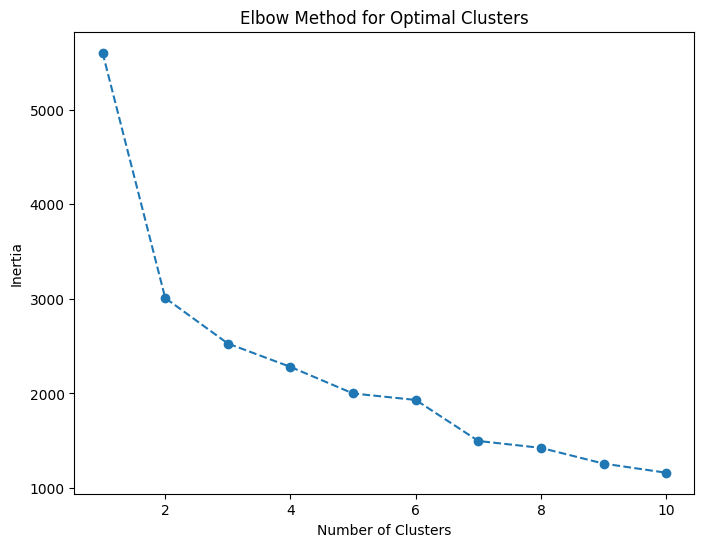

In [21]:
# Elbow method to determine the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
